In [13]:
import fitsio
import os, glob
import fitsio
from scipy.ndimage.filters import gaussian_filter 
from scipy.signal import convolve2d
from scipy.io import readsav
import numpy as np
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
# Load FLCT
from pathlib import Path
import time
import numpy as np

FS = 16
matplotlib.rcParams.update({'font.size': FS})
matplotlib.rcParams.update({'xtick.labelsize': FS, 'ytick.labelsize': FS})

In [7]:
lon_lats = [(60.4, 0), (60.4, 60), (60.4, 70), (0, 0), (350, 0)]
nevents = len(lon_lats)

unit = 368000 / 45 # m/s
fwhm = 11
nframes = 320
tavgs = range(40,nframes+1,8)
tranges = [[0, tavg] for tavg in tavgs]
print(tranges)
nflows = len(tranges)

veldirs = [os.path.join(os.environ['DATA'], 'SDO/HMI/polar_study/lonCR_{:05.1f}_lat_{:04.1f}'.format(lon_lat[0], lon_lat[1]))
                for lon_lat in lon_lats]
vxfiles = [sorted(glob.glob(os.path.join(veldir, 'widening_average', 'vx_fwhm{:d}*.fits'.format(fwhm)))) for veldir in veldirs]
vyfiles = [sorted(glob.glob(os.path.join(veldir, 'widening_average', 'vy_fwhm{:d}*.fits'.format(fwhm)))) for veldir in veldirs]
# print(velfiles[0][-1])
# print(velfiles[1][-1])
vxs = []
vys = []
for vxf,vyf in zip(vxfiles, vyfiles):
    print('vx: ', vxf[-1])
    vxs.append(fitsio.read(vxf[-1])*unit)
    vys.append(fitsio.read(vyf[-1])*unit)

[[0, 40], [0, 48], [0, 56], [0, 64], [0, 72], [0, 80], [0, 88], [0, 96], [0, 104], [0, 112], [0, 120], [0, 128], [0, 136], [0, 144], [0, 152], [0, 160], [0, 168], [0, 176], [0, 184], [0, 192], [0, 200], [0, 208], [0, 216], [0, 224], [0, 232], [0, 240], [0, 248], [0, 256], [0, 264], [0, 272], [0, 280], [0, 288], [0, 296], [0, 304], [0, 312], [0, 320]]
vx:  /mnt/data2/SDO/HMI/polar_study/lonCR_060.4_lat_00.0/widening_average/vx_fwhm11_tavg320_035.fits
vx:  /mnt/data2/SDO/HMI/polar_study/lonCR_060.4_lat_60.0/widening_average/vx_fwhm11_tavg320_035.fits
vx:  /mnt/data2/SDO/HMI/polar_study/lonCR_060.4_lat_70.0/widening_average/vx_fwhm11_tavg320_035.fits
vx:  /mnt/data2/SDO/HMI/polar_study/lonCR_000.0_lat_00.0/widening_average/vx_fwhm11_tavg320_035.fits
vx:  /mnt/data2/SDO/HMI/polar_study/lonCR_350.0_lat_00.0/widening_average/vx_fwhm11_tavg320_035.fits


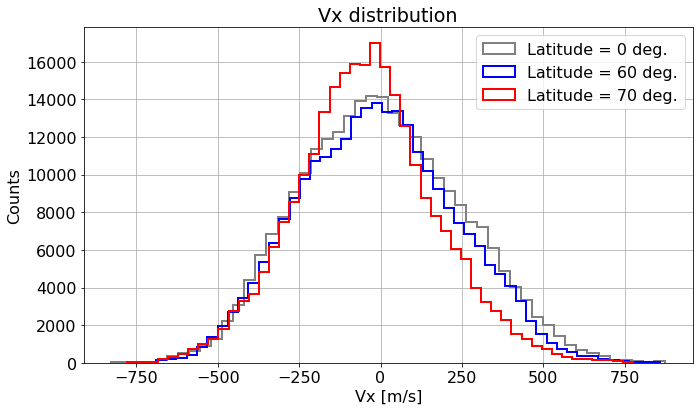

In [16]:
# Plot Vx velocity distribution

plt.figure(figsize=(10,6))
plt.hist(vxs[0].ravel(), bins=50, color='gray', histtype='step', lw=2, label='Latitude = 0 deg.')
plt.hist(vxs[1].ravel(), bins=50, color='blue', histtype='step', lw=2, label='Latitude = 60 deg.')
plt.hist(vxs[2].ravel(), bins=50, color='red', histtype='step', lw=2, label='Latitude = 70 deg.')
plt.xlabel('Vx [m/s]')
plt.ylabel('Counts')
plt.title('Vx distribution')
plt.grid()
plt.legend()
plt.tight_layout()
figf = os.path.join(os.environ['DATA'], 'SDO/HMI/polar_study/vx_histograms_lat_0_60_70.png')
plt.savefig(figf)


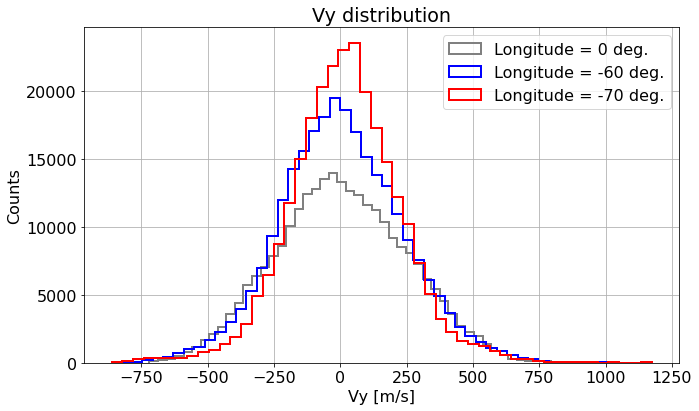

In [17]:
plt.figure(figsize=(10,6))
plt.hist(vys[0].ravel(), bins=50, color='gray', histtype='step', lw=2, label='Longitude = 0 deg.')
plt.hist(vys[3].ravel()*1.15, bins=50, color='blue', histtype='step', lw=2, label='Longitude = -60 deg.')
plt.hist(vys[4].ravel()*1.53, bins=50, color='red', alpha=1.0, histtype='step', lw=2, label='Longitude = -70 deg.')
plt.xlabel('Vy [m/s]')
plt.ylabel('Counts')
plt.title('Vy distribution')
plt.grid()
plt.legend()
plt.tight_layout()
figf = os.path.join(os.environ['DATA'], 'SDO/HMI/polar_study/vy_histograms_lon_0_60_70.png')
plt.savefig(figf)